In [110]:
import numpy as np
from matplotlib import pyplot as plt

#--------------------------------------------------------------------------#
# 该神经网络包括除输入和输出层以外，还包括一个隐层（两个神经元，激活函数为sigmoid）

# 网络第一层的线性变换    
def liner_layer1(x1, x2):
    z1 = -2 * x1 + 2* x2 - 1    # 隐层中连接输入层的第一个神经的权值和偏置分别设为 w =（-2,2）, b = -1 
    z2 = 2 * x1 + (-2) * x2 - 1 # 隐层中连接输入层的第一个神经的权值和偏置分别设为 w =（2, -2）, b = -1 
    return z1, z2
    
# 网络第二层的线性变换; 输出层的两个权值和偏置分别为 w = (1, 1), b = -0.7    
def liner_layer2(x1, x2):
    return x1 + x2 - 0.7

# 自定义一个sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#--------------------------------------------------------------------------#
# 绘制输入特征空间中XOR问题中四个角点的空间分布
# 相同颜色表示同一个类（红色为左上角和右下角点；绿色为左下角和右上角的点）、不同形状是为了区分同类点的不同位置
def plot_XORpoint(x1, x2, ax ):
    color = [[1,0,0],[1,0,0],[0,1,0],[0,1,0]]
    marker=['*','^','s','p']
    ## 使用zip()函数将参数中的元素（x1, x2, color, marker）打包成元组，以便在for循环中使用
    for a,b,c,m in zip(x1, x2, color, marker):
        ax.scatter(a, b, color=c, s=200, marker=m, edgecolors='black',linewidths=2.0)
    return
# 在指定或者默认的axes中绘制输入特征空间中网格点的空间分布
def plot_GridPoint(x1, x2, ax):
    fig = plt.gcf()
    m1 = ax.scatter(x1, x2, c=color, s = 20,edgecolors='white',linewidths = 0.5)
    ax.axis('equal')
    
    return m1

# 在指定或者默认的axes中、由(X1,X2)构成的二维平面上，绘制Z值的等值线
def plot_GridContourf(X1, X2, Z,  axes, title = ''):
    cf = axes.contourf(X1, X2, Z,10, alpha=0.5, cmap=plt.get_cmap('jet'))
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.set_title(title)
    axes.clabel(cf,inline=True)
    fig.colorbar(cf,ax=axes)
    plot_XORpoint(px1, px2,axes)
    return

In [112]:
# 将原始输入特征空间分割成等间隔的网格点：（从-0.1到1.01）以0.01为间隔剖分成102*102个离散的点
X1, X2 = np.mgrid[-0.01:1.01:0.01, -0.01:1.01:0.01]
#让多维数组变成一维数组
x1 = X1.ravel()
x2 = X2.ravel()

# XOR问题的四个样本点的二维坐标（代表两个不同的类）
px1, px2 = np.array([0,1,0,1]), np.array([1,0,0,1])

In [114]:
#-------网络输入层对应特征空间的剖分-------------#
#将原始输入特征空间分割成等间隔的网格点（从-0.1到1.01）以0.01为间隔剖分成102*102个离散的点
dx1 = x1 - 0.5
dx2 = x2 - 0.5
dist = np.array([np.abs(dx1), np.abs(dx2)]).min(axis=0)

mask_b = (dx1 * dx2) > 0
mask_a = (dx1 * dx2) < 0

#根据距离理想分类边界（x1=0.5 和x2 = 0.5）设置网格点的颜色（便于区分格网点在输入特征空间中的位置）
color = [mask_a * dist, mask_b * dist, [0] * len(mask_a)]
color = np.array(color).T

In [116]:
#计算输入特征空间中的点经过网络的隐层和输出层以后的值
Z1, Z2 = liner_layer1(X1, X2)      #隐层的线性变换
A1, A2  = sigmoid(Z1), sigmoid(Z2) #隐层的非线性变换
Z = liner_layer2(A1, A2)           #输出层的线性变换
A   = sigmoid(Z)                   #输出层的非线性变换（最终输出结果）

#四个样本（角落上的点）进行上述同类的前向计算
pz1, pz2 = liner_layer1(px1, px2)      #隐层的线性变换
pa1, pa2 = sigmoid(pz1), sigmoid(pz2)  #隐层的非线性变换
pz  = liner_layer2(pa1, pa2)           #输出层的线性变换
pa  = sigmoid(pz)                      #输出层的非线性变换（最终输出结果）

(0.0, 1.0, 0.0, 1.0)

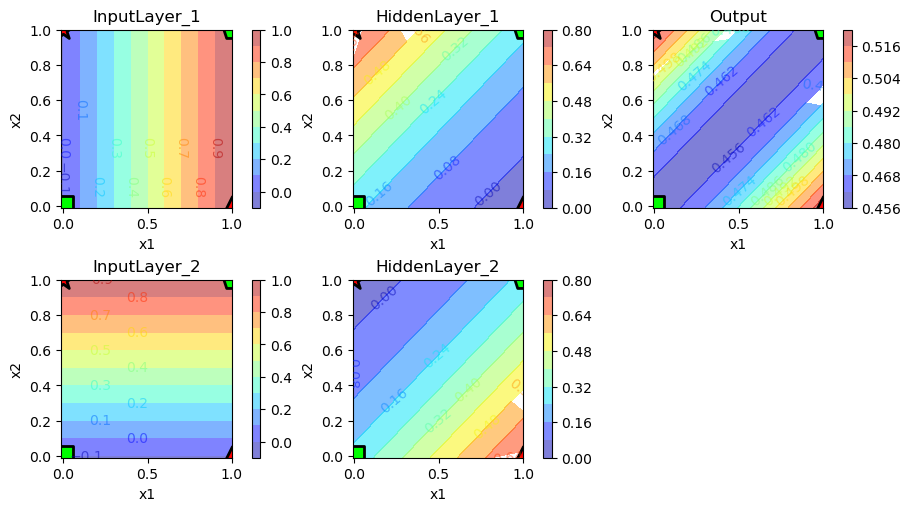

In [118]:
#-----以类似Neural Network Playgroud的风格可视化各个神经元的输出值-----#
fig, axes = plt.subplots(2,3,figsize=(9, 5), layout='constrained')

plot_GridContourf(X1, X2, X1, axes[0,0],'InputLayer_1') # 输入层的第一个神经元
plot_GridContourf(X1, X2, X2, axes[1,0],'InputLayer_2') # 输入层的第二个神经元
plot_GridContourf(X1, X2, A1, axes[0,1],'HiddenLayer_1') #隐层第一个神经元
plot_GridContourf(X1, X2, A2, axes[1,1],'HiddenLayer_2') #隐层第二个神经元
plot_GridContourf(X1, X2, A, axes[0,2],'Output')         # 输出层
axes[1,2].axis('off')                                    # 默认关闭该子图

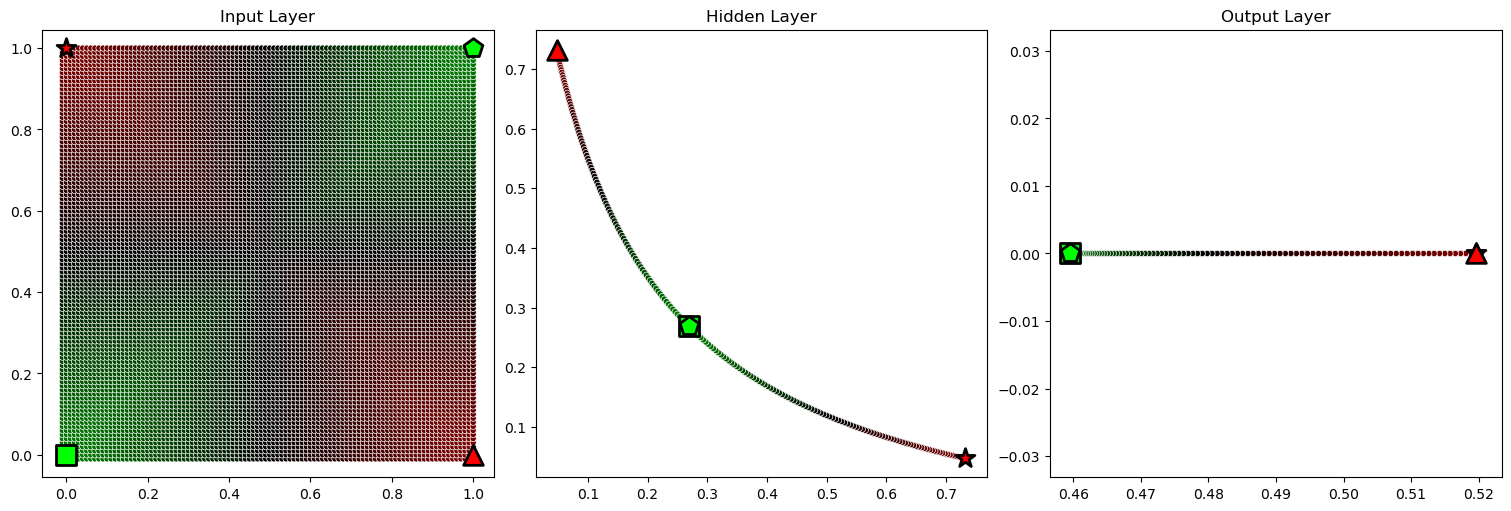

In [120]:
#-----以神经网络的层为基本单元，可视化输入层和隐层与输出层的值在各自特征空间中的分布-----#
fg, ax = plt.subplots(1,3, figsize=(15, 5), layout='constrained')
#输入层(网格点的不同颜色代表其距离理想分类边界的距离)
ax[0].set_title('Input Layer')
plot_GridPoint(x1, x2, ax[0])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(px1, px2,ax[0])       #绘制四个样本点

                    
# 隐层 (非线性变换) 
ax[1].set_title('Hidden Layer')
plot_GridPoint(A1, A2, ax[1])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pa1, pa2,ax[1])  #绘制四个样本点

# 输出层
ax[2].set_title('Output Layer')
x_05 = np.zeros(np.size(A))
plot_GridPoint( A, x_05, ax[2])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pa, x_05, ax[2])  #绘制四个样本点

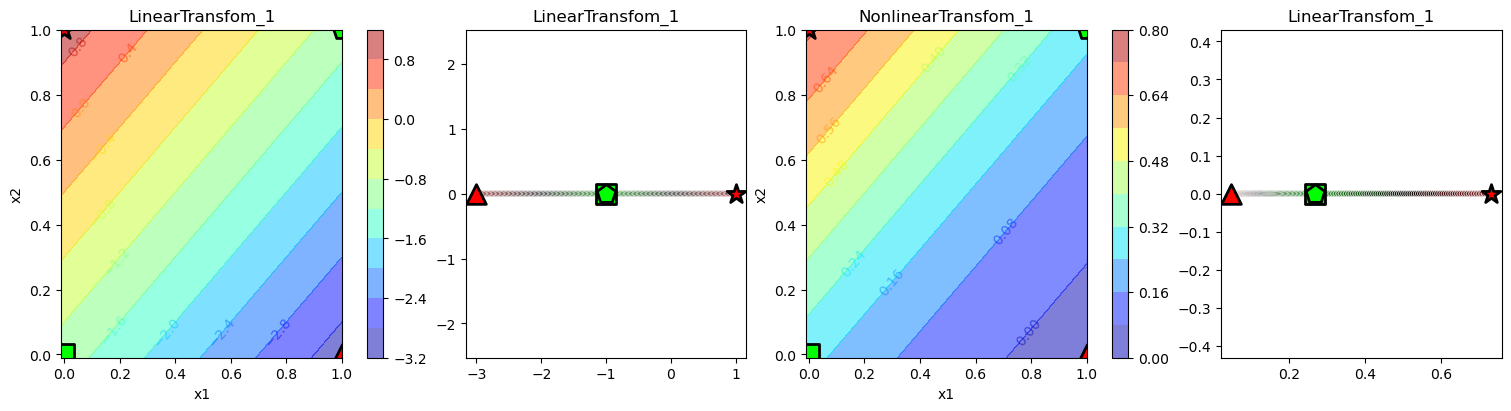

In [121]:
#-----隐层-----#
# 第一个神经元
fg, ax = plt.subplots(1,4, figsize=(15, 4), layout='constrained')

# 在二维输入特征空间中可视化每个点线性变换以后的值
plot_GridContourf(X1, X2, Z1, ax[0],'LinearTransfom_1') # 输入层的第一个神经元

# 在线性变换后的一维空间中的值（显示成沿横轴分布）
x_0 = np.zeros(np.size(A))
ax[1].set_title('LinearTransfom_1')
plot_GridPoint(Z1, x_0, ax[1])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pz1, x_0, ax[1])  #绘制四个样本点

# 在二维输入特征空间中可视化每个点非线性变换以后的值
plot_GridContourf(X1, X2, A1, ax[2],'NonlinearTransfom_1') # 输入层的第一个神经元

# 在非线性变换后的一维空间中的值（显示成沿横轴分布）
ax[3].set_title('LinearTransfom_1')
plot_GridPoint(A1, x_0, ax[3])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pa1, x_0, ax[3])  #绘制四个样本点


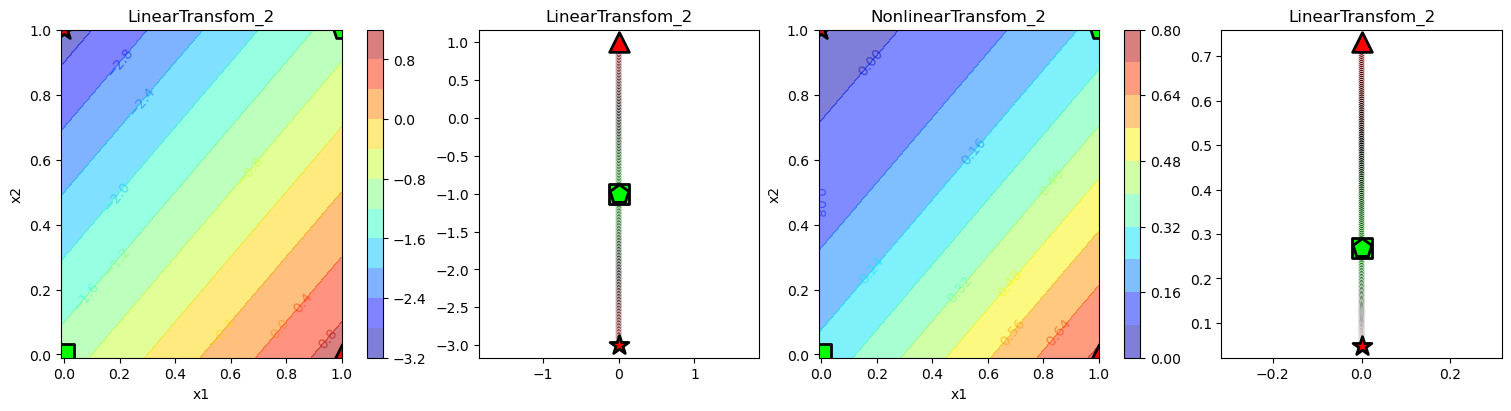

In [122]:
# 第二个神经元
fg, ax = plt.subplots(1,4, figsize=(15, 4), layout='constrained')

# 在二维输入特征空间中可视化每个点线性变换以后的值
plot_GridContourf(X1, X2, Z2, ax[0],'LinearTransfom_2') # 输入层的第二个神经元
x_0 = np.zeros(np.size(A))

# 在线性变换后的一维空间中的值（显示成沿纵轴分布）
ax[1].set_title('LinearTransfom_2') 
plot_GridPoint(x_0, Z2, ax[1])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(x_0, pz2, ax[1])  #绘制四个样本点

# 在二维输入特征空间中可视化每个点非线性变换以后的值
plot_GridContourf(X1, X2, A2, ax[2],'NonlinearTransfom_2') # 输入层的第二个神经元

# 在非线性变换后的一维空间中的值（显示成沿纵轴分布）
ax[3].set_title('LinearTransfom_2')
plot_GridPoint(x_0, A2, ax[3])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(x_0, pa2, ax[3])  #绘制四个样本点


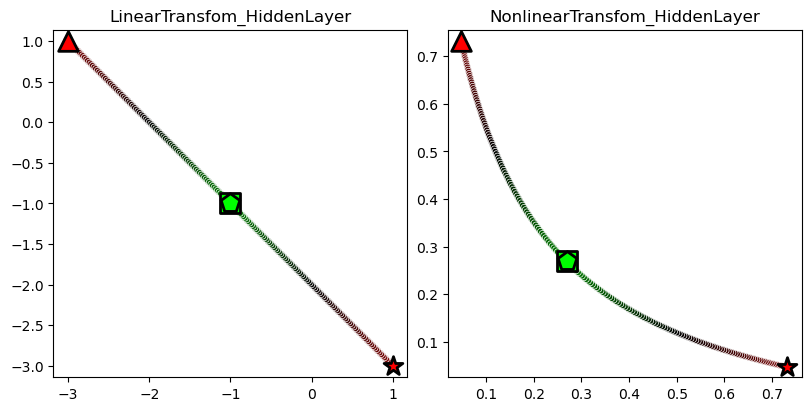

In [124]:
# 整个隐层
# 线性变换
fg, ax = plt.subplots(1,2, figsize=(8, 4), layout='constrained')

# 非线性变换
ax[0].set_title('LinearTransfom_HiddenLayer')
plot_GridPoint(Z1, Z2, ax[0])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pz1, pz2,ax[0])  #绘制四个样本点

# 非线性变换
ax[1].set_title('NonlinearTransfom_HiddenLayer')
plot_GridPoint(A1, A2, ax[1])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pa1, pa2,ax[1])  #绘制四个样本点

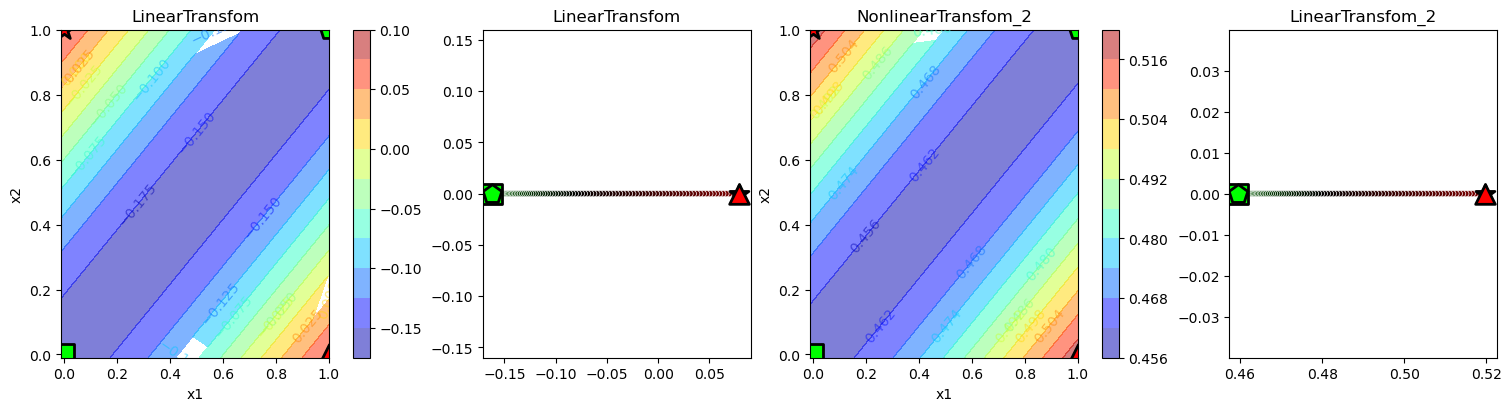

In [125]:
#输出层（一个神经元，因此不再重复可视化整个层的变换过程）
fg, ax = plt.subplots(1,4, figsize=(15, 4), layout='constrained')

# 在二维输入特征空间中可视化每个点线性变换以后的值
plot_GridContourf(X1, X2, Z, ax[0],'LinearTransfom')

# 在线性变换后的一维空间中的值
x_0 = np.zeros(np.size(A))
ax[1].set_title('LinearTransfom') 
plot_GridPoint(Z, x_0, ax[1])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pz, x_0, ax[1])  #绘制四个样本点

# 在二维输入特征空间中可视化每个点非线性变换以后的值
plot_GridContourf(X1, X2, A, ax[2],'NonlinearTransfom_2') # 输入层的第二个神经元

# 在非线性变换后的一维空间中的值
ax[3].set_title('LinearTransfom_2')
plot_GridPoint(A, x_0, ax[3])  #绘制特征空间中所有划分出来的网格点（102*102个离散的点）
plot_XORpoint(pa, x_0, ax[3])  #绘制四个样本点